### Ejercicio 1

In [2]:
import numpy as np
import control as ctr
# Escribo las matrices A y B del sistema:

A = np.array([[0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 0, 0, 0]])

B = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, 1],
              [0, 0]])

# Determino la Matriz de Kalman para estudiar controlabilidad:

Kalman = ctr.ctrb(A, B)

print("Rango de la matriz de Kalman:", np.linalg.matrix_rank(Kalman))

if np.linalg.matrix_rank(Kalman) == np.shape(A)[0]:
    print("El sistema es controlable")

Rango de la matriz de Kalman: 5
El sistema es controlable


Para estudiar la existencia de un control de tiempo mínimo, bastaría ver la existencia de un control que lleve el sistema al origen. Este existe, ya que la condicion inicial para $(x, y)$ está dentro de la caja $[-5, 5] \times [-5, 5]$,  por lo que podemos controlar la aceleración (y por ende la posición, considerando que la partícula parte del reposo) en $(x, y)$ de la partícula. Esto nos permite controlar la posición en $z$, ya que indirectamente controlamos su velocidad mediante un control de $x$ e $y$. Así, podemos llevar la partícula al origen, y por ende existe un control de tiempo mínimo.

Un ejemplo más concreto en este caso, sería escoger un control inicial tal que $x$ e $y$ lleguen a 0, luego, un control que los lleve a $(-\epsilon, -\epsilon)$, con $\epsilon$ suficientemente pequeño. Esto hace que $z$ baje lentamente, tan lento como quisieramos. Luego, cuando $z$ esté lo suficientemente cerca del origen, podemos escoger un control que lleve a $(x, y)$ a $(0, 0)$ tal que coincida con llevar a $z$ a 0. Esto nos permite llevar a la partícula al origen. Como existe una solución factible, entonces existe una solución minimal.

### Ejercicio 2

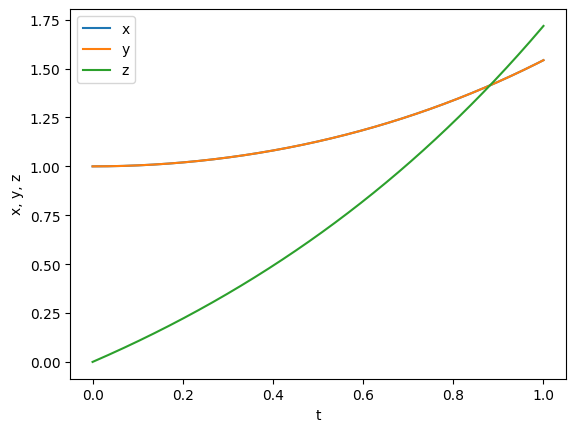

In [6]:
# Método de Euler a paso fijo:

def rhs(r, control, t):
    result = A @ r + B @ control(t)
    assert result.shape == r.shape
    return result

def paso_euler(r, control, h, t):
    return r + h * rhs(r, control, t)


r0 = np.array([1, 0, 1, 0, 0])
h = 1e-4
N = 10000

times = np.arange(N + 1) * h
solution = np.zeros((N + 1, 5))
solution[0] = r0

for i in range(N):
    solution[i + 1] = paso_euler(solution[i], lambda t: np.array([0, 0]), h, times[i])

import matplotlib.pyplot as plt

plt.clf()
plt.plot(times, solution[:, 0], label="x")
plt.plot(times, solution[:, 2], label="y")
plt.plot(times, solution[:, 4], label="z")
plt.legend()
plt.xlabel("t")
plt.ylabel("x, y, z")
plt.show()

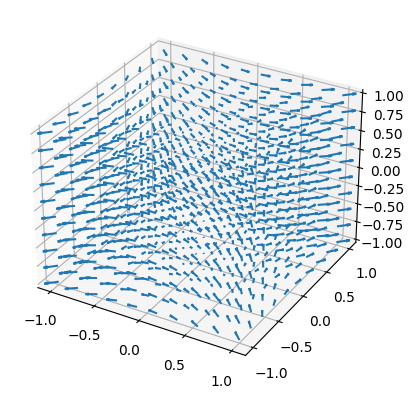

In [9]:
# Quiver plot of RHS over x,y,z cube:
def plot_quiver(A, B, constant_control):
    x = np.linspace(-1, 1, 10)
    y = np.linspace(-1, 1, 10)
    z = np.linspace(-1, 1, 10)

    X, Y, Z = np.meshgrid(x, y, z)

    

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.quiver(X, Y, Z, U, V, W, length=0.1)
    plt.show()